# Parallelization

In [6]:
import os 
from langchain_openai import AzureChatOpenAI
import dotenv
from typing import TypedDict
from langgraph.graph import StateGraph, START, END 


dotenv.load_dotenv()


llm = AzureChatOpenAI(
    openai_api_version=os.getenv("AZURE_OpenAI_API_VERSION_3"),
    azure_deployment=os.getenv('AZURE_OPENAI_DEPLOYMENT_MODEL_3'),
    model_name=os.getenv('AZURE_OPENAI_DEPLOYMENT_MODEL_3'),
    api_key=os.getenv('OPENAI_API_KEY_3'),
    azure_endpoint=os.getenv('AZURE_OpenAI_ENDPOINT_3')
   )

llm.invoke('hello').content

'Hello! How can I assist you today? 😊'

In [50]:
# graph state 
class State(TypedDict):
    topic:str 
    joke: str 
    story:str 
    poem: str 
    combined_output: str 


def make_joke(state:State):
    joke=llm.invoke(f'write a short joke on {state["topic"]}')
    return {'joke':joke.content}

def write_story(state:State):
    story=llm.invoke(f'write a short story on the joke {state["joke"]}')
    return {'story':story.content} 

def write_poem(state:State):
    poem=llm.invoke(f'write a short poem on the joke {state["joke"]}')
    return {'poem':poem.content} 

def combined_output(state:State):
    combined=llm.invoke(f'combine all: {state["story"]},poem: {state["poem"]}, joke:{state["joke"]}')
    return {'combined_output':combined.content}


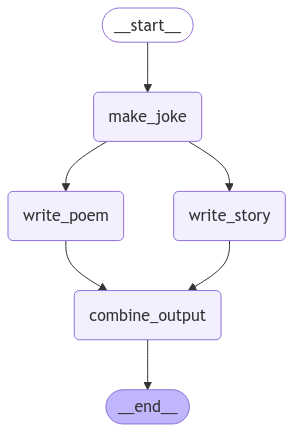

In [51]:
parallel_builder=StateGraph(State)

# Add nodes 
parallel_builder.add_node('make_joke',make_joke)
parallel_builder.add_node('write_story',write_story)
parallel_builder.add_node('write_poem',write_poem)
parallel_builder.add_node('combine_output',combined_output)

# add edges 
parallel_builder.add_edge(START,'make_joke')
parallel_builder.add_edge('make_joke', 'write_story')
parallel_builder.add_edge('make_joke', 'write_poem')

parallel_builder.add_edge('write_story', 'combine_output')
parallel_builder.add_edge('write_poem', 'combine_output')
parallel_builder.add_edge('combine_output',END)

graph=parallel_builder.compile()
graph 


In [52]:
out=graph.invoke({'topic':'batman'})
print(out['combined_output'])

**The Bat Chill**

Gotham City had been unusually quiet for weeks. No sinister cackles from the Joker, no chaotic schemes from the Riddler, and even Penguin seemed to have waddled off on vacation. For once, things were… normal. Which was a rarity in the dark, brooding urban sprawl Batman called home.

Bruce Wayne sat in the Batcave, scanning his crime-monitoring systems for any signs of trouble. Alfred stood nearby, polishing an antique teapot.

"Master Wayne, perhaps the criminals of Gotham have also decided to… what's the phrase today? Take a chill pill?" Alfred quipped with a sly grin.

Bruce, still in full cape and cowl, despite the quiet night, rubbed his temple. The legendary crime-fighting force of justice looked, frankly, exhausted. Between the late nights, crime sprees, and a diet of microwaveable food, even the Dark Knight needed a breather.

"Alfred," Bruce finally said, leaning back in his chair, "I think I need a break."

Alfred raised an eyebrow. "A *break*, sir? You? Sur